In [2]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette2.tgz

--2022-09-11 19:12:03--  https://s3.amazonaws.com/fast-ai-imageclas/imagenette2.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.44.16
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.44.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1557161267 (1.5G) [application/x-tar]
Saving to: ‘imagenette2.tgz’

imagenette2.tgz     100%[===================>]   1.45G  61.3MB/s    in 22s     

2022-09-11 19:12:25 (66.1 MB/s) - ‘imagenette2.tgz’ saved [1557161267/1557161267]



In [4]:
!tar -xf imagenette2.tgz

In [5]:
from keras.preprocessing.image import ImageDataGenerator

# create a new generator
imagegen = ImageDataGenerator()
# load train data
train = imagegen.flow_from_directory("imagenette2/train/", class_mode="categorical", shuffle=False, batch_size=128, target_size=(224, 224))
# load val data
val = imagegen.flow_from_directory("imagenette2/val/", class_mode="categorical", shuffle=False, batch_size=128, target_size=(224, 224))

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout

# build a sequential model
model = Sequential()
model.add(InputLayer(input_shape=(224, 224, 3)))

# 1st conv block
model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
# 2nd conv block
model.add(Conv2D(50, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())
# 3rd conv block
model.add(Conv2D(70, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(BatchNormalization())
# ANN block
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.25))
# output layer
model.add(Dense(units=10, activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# fit on data for 30 epochs
model.fit_generator(train, epochs=30, validation_data=val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
74/74 [==============================] - 708s 10s/step - loss: 2.5564 - accuracy: 0.1563 - val_loss: 2.5966 - val_accuracy: 0.1159
Epoch 2/30
 7/74 [=>............................] - ETA: 9:06 - loss: 2.2042 - accuracy: 0.2366

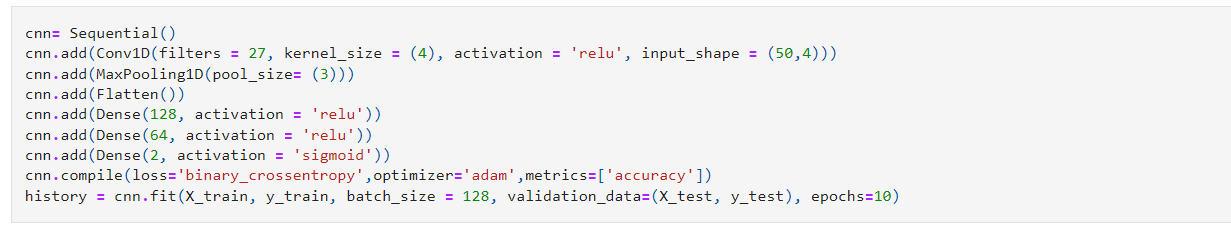